In [1]:
import sys
import socket
isliv = 'livljobs' in socket.gethostname()
if isliv:
 sys.path.insert(0,'/login/jholt/work/Git/COAsT/')
else:
 sys.path.insert(0,'/home/users/jholt/Git/COAsT/')

import matplotlib.pylab as plt
import coast
import numpy as np

In [8]:

names,dpaths,DOMS,_  = coast.experiments(experiments='../Python/experiments.json') 
fnam='SENEMO_1m_19900101_19901231_grid_T_199008-199008.nc'
fnam2='SN-CNRM_1m_19800101_19801231_grid_T_198008-198008.nc'


In [9]:
fn_nemo_dat = dpaths[0] + fnam
fn_config_t_grid='/home//users/jholt/work/Git/COAsT/config/example_nemo_grid_t.json'
nemo_t1 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[0], config=fn_config_t_grid)

fn_nemo_dat = dpaths[1] + fnam
nemo_t2 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[1], config=fn_config_t_grid)
fn_nemo_dat = dpaths[2] + fnam
nemo_t3 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[2], config=fn_config_t_grid)

In [ ]:
fn_nemo_dat = dpaths[3] + fnam2
nemo_t4 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[3], config=fn_config_t_grid)

Temperature profiles

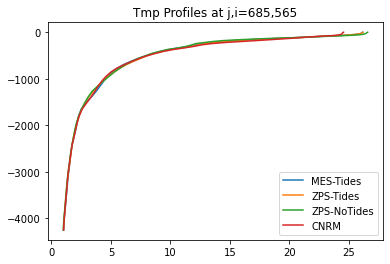

In [11]:
#North Sea
j=950
i=1140


#Indo seas
#j=660
#i=200



#Equitorial Pacific
i=565
j=685

T1=nemo_t1.dataset.variables['thetao_con'].values[0,:,j,i]
T2=nemo_t2.dataset.variables['thetao_con'].values[0,:,j,i]
T3=nemo_t3.dataset.variables['thetao_con'].values[0,:,j,i]
T4=nemo_t4.dataset.variables['thetao_con'].values[0,:,j,i]

Z1=nemo_t1.dataset.coords['depth_0'].values[:,j,i]
Z2=nemo_t2.dataset.coords['depth_0'].values[:,j,i]
Z3=nemo_t3.dataset.coords['depth_0'].values[:,j,i]
Z4=nemo_t3.dataset.coords['depth_0'].values[:,j,i]

plt.plot(T1,-Z1,T2,-Z2,T3,-Z3,T4,-Z4)
plt.legend(['MES-Tides','ZPS-Tides','ZPS-NoTides','CNRM'])
plt.title('Tmp Profiles at j,i={0},{1}'.format(j,i))
plt.savefig('../Figures/tmp_prof_j{0}_i{1}_1990_MES_ZPS-Tide_ZPS-NOTide_CNRM.png'.format(j,i))

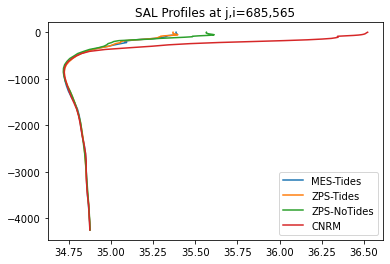

In [29]:
T1=nemo_t1.dataset.variables['so_abs'].values[0,:,j,i]
T2=nemo_t2.dataset.variables['so_abs'].values[0,:,j,i]
T3=nemo_t3.dataset.variables['so_abs'].values[0,:,j,i]
T4=nemo_t4.dataset.variables['so_abs'].values[0,:,j,i]

Z1=nemo_t1.dataset.coords['depth_0'].values[:,j,i]
Z2=nemo_t2.dataset.coords['depth_0'].values[:,j,i]
Z3=nemo_t3.dataset.coords['depth_0'].values[:,j,i]
Z4=nemo_t4.dataset.coords['depth_0'].values[:,j,i]

plt.plot(T1,-Z1,T2,-Z2,T3,-Z3,T4,-Z4)
plt.legend(['MES-Tides','ZPS-Tides','ZPS-NoTides','CNRM'])
plt.title('SAL Profiles at j,i={0},{1}'.format(j,i))
plt.savefig('../Figures/sal_prof_j{0}_i{1}_1990_MES_ZPS-Tide_ZPS-NOTide_CNRM.png'.format(j,i),transparent=False)

In [ ]:
print(nemo_t2.dataset.longitude.values[j,i])

In [ ]:
print(nemo_t2.dataset.latitude.values[j,i])

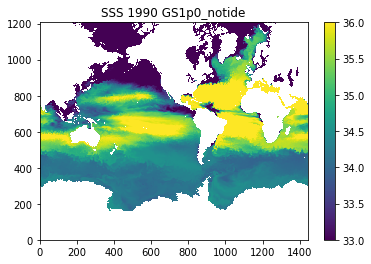

In [23]:
plt.pcolormesh(nemo_t3.dataset.variables['so_abs'].values[0,0,:,:],vmin=33,vmax=36)
plt.colorbar(orientation='vertical')
plt.title('SSS 1990 '+names[2])
plt.savefig('../Figures/SSS_1990_{0}.png'.format(names[2]))

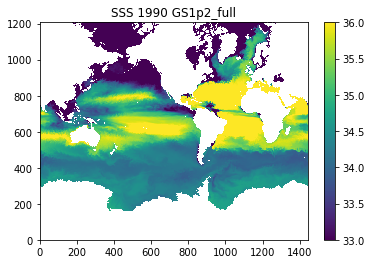

In [25]:
plt.pcolormesh(nemo_t1.dataset.variables['so_abs'].values[0,0,:,:],vmin=33,vmax=36)
plt.colorbar(orientation='vertical')
plt.title('SSS 1990 '+names[0])
plt.savefig('../Figures/SSS_1990_{0}.png'.format(names[0]))

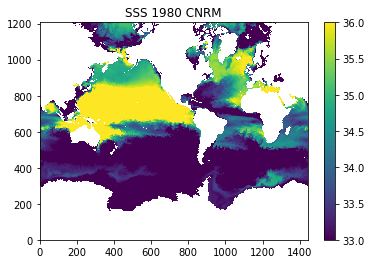

In [27]:
plt.pcolormesh(nemo_t4.dataset.variables['so_abs'].values[0,0,:,:],vmin=33,vmax=36)
plt.colorbar(orientation='vertical')
plt.title('SSS 1980 '+names[3])
plt.savefig('../Figures/SSS_1980_{0}.png'.format(names[3]))